In [1]:
####The main program file
import pandas as pd
import os
from config import (gkey)
import gmaps
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
### Load Data File




In [3]:
#CALLLING OUT CSV FILE LOCATIONS
csv_path_1 = os.path.join ("..","Resources","Census_Data_2015.csv")
csv_path_2 = os.path.join("..", "Resources","Tract_lat_lon.csv")

# READING CSV DATA INTO DATA FRAMES
HV_maindata_1_df = pd.read_csv(csv_path_1)
HV_lat_lon_tract_df = pd.read_csv(csv_path_2)

#CHECKING DATA FRAME HEADS TO ENSURE DATA IS BEING CORRECLTY READ
HV_maindata_1_df.head()
HV_lat_lon_tract_df.head()

#MERGING TWO DATA FRAMES TO GET FINAL DATAFRAME WITH CENSUS AND GEOGROPHIC INFO COMBINED
# THE INNER MERGE WILL ONLY SHOW THOSE ROWS THAT HAVE INFO IN BOTH CSV FILES. IN DOING THIS WE LOST DATA OF 25 TRACT WHICH DID NOT HAVE LAT LONGS

HV_final_df = pd.merge(HV_maindata_1_df, HV_lat_lon_tract_df, on='CENSUSTRACT', how = 'inner')

#CHECKING DATA FRAME SHAPE TO SEE HOW MANY ROWS AND COLUMNS ARE THERE. 
#THIS HV_final_df IS THE DATA FRAME THAT CAN BE USED BY ALL TEAM MEMBERS FOR THEIR INDIVIDUAL PROCESSING


#OUTPUT THE FINAL DATA FRAME WITH LAT LON + CENSUS DATA INTO CSV FILE IN OUTPUT FOLDER
#HV_final_df.to_csv(os.path.join("..","Output", "Census_data_and_lat_lon.csv"), encoding = "utf-8", index = False)


In [4]:
###GEOMAPPING CENSUS FOOD DESERT DATA

In [5]:
# CONFIGURING GMAP WITH API KEYS
gmaps.configure (api_key = gkey)

In [69]:
##GETTING TWO VARIABLES FROM MAIN DATAFRAME - (A) LAT LON AND (B) FOOD DESERT SCORE

HV_location = HV_final_df [["LAT", "LON"]]
HV_FD_Score = HV_final_df ["Food Desert Score"]

In [70]:
##CREATING FOOD DESERT HEATMAP LAYER

# CREATE THE MAP
HV_fig = gmaps.figure()

# CREATE HEATMAP LAYER USING HV_LOCATION AND HV_FD_SCORE (FOOD DESERT SCORE)
HV_heat_layer = gmaps.heatmap_layer(HV_location, weights=HV_FD_Score, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=0.3)
# Add heatmap layer to figure
HV_fig.add_layer(HV_heat_layer)

# Display the figure
HV_fig

Figure(layout=FigureLayout(height='420px'))

In [72]:
#Mapping food desert areas with a score of 3 or more
location = FoodDesert_count[["LAT","LON"]]
JW_fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(location, weights=poverty_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=0.3)
JW_fig.add_layer(heat_layer)
JW_fig

Figure(layout=FigureLayout(height='420px'))

In [10]:
#Open CSV file with the Census combined data, and read the file. 
csv_main = os.path.join("..","Output", "Census_data_and_lat_lon.csv")

JW_Sourcedata_df = pd.read_csv(csv_main)
#checking the data columns
JW_Sourcedata_df.head()
                         

,CENSUSTRACT,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,LAT,LON
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,45,44,26,112,9817813.0,28435,3.791,0.011,32.481959,-86.491338
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,55,75,87,202,3325680.0,5669,1.284,0.002,32.475758,-86.472468
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,117,87,108,120,5349273.0,9054,2.065,0.003,32.474024,-86.459703
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,74,85,19,82,6384276.0,8408,2.465,0.003,32.471030,-86.444835
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,310,355,198,488,11408866.0,43534,4.405,0.017,32.458922,-86.421826


In [11]:
#Renaming column headings
JW_Sourcedata_df_rename = JW_Sourcedata_df.rename(columns= {"POP2010": "Population",
                                                "PovertyRate": "Poverty Rate (%)",
                                                "MedianFamilyIncome": "Median Family Income",})
#confirming output
JW_Sourcedata_df_rename.head()

,CENSUSTRACT,State,County,Urban,Population,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,LAT,LON
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,45,44,26,112,9817813.0,28435,3.791,0.011,32.481959,-86.491338
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,55,75,87,202,3325680.0,5669,1.284,0.002,32.475758,-86.472468
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,117,87,108,120,5349273.0,9054,2.065,0.003,32.474024,-86.459703
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,74,85,19,82,6384276.0,8408,2.465,0.003,32.471030,-86.444835
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,310,355,198,488,11408866.0,43534,4.405,0.017,32.458922,-86.421826


In [13]:
#reduced columns to only the information used, and confirming result
reduced_df = JW_Sourcedata_df_rename[["State", "County", "Population", "Poverty Rate (%)",
                       "Median Family Income", "Food Desert Score", "LAT", "LON"]]
reduced_df.head()

,State,County,Population,Poverty Rate (%),Median Family Income,Food Desert Score,LAT,LON
0,Alabama,Autauga,1912,10.0,74750,0,32.481959,-86.491338
1,Alabama,Autauga,2170,18.2,51875,0,32.475758,-86.472468
2,Alabama,Autauga,3373,19.1,52905,0,32.474024,-86.459703
3,Alabama,Autauga,4386,3.3,68079,0,32.471030,-86.444835
4,Alabama,Autauga,10766,8.5,77819,0,32.458922,-86.421826


In [14]:
#Filter to areas with food desert score of 3
FoodDesert_count = reduced_df[reduced_df['Food Desert Score'] == 3]


print(FoodDesert_count)
FoodDesert_count.count().head()

         State   County  Population  Poverty Rate (%)  Median Family Income  \
6      Alabama  Autauga        2891              26.4                 43646   
17     Alabama  Baldwin        3325              28.0                 32255   
37     Alabama  Baldwin        4799              23.0                 39063   
40     Alabama  Baldwin       10534              26.5                 50139   
51     Alabama  Barbour        4583              31.6                 38571   
...        ...      ...         ...               ...                   ...   
72765  Wyoming  Laramie        3026              20.0                 43833   
72766  Wyoming  Laramie        3072               1.8                 46216   
72772  Wyoming  Laramie        4899              21.9                 42250   
72781  Wyoming  Natrona        4385              18.3                 32083   
72803  Wyoming     Park        5769              10.3                 56942   

       Food Desert Score        LAT         LON  
6

State                   8102
County                  8102
Population              8102
Poverty Rate (%)        8102
Median Family Income    8102
dtype: int64

In [173]:
#Group by State
FoodDesert_Groupby = FoodDesert_count.groupby('State')['Poverty Rate (%)','Median Family Income','Population'].mean()

#Check data
#print(FoodDesert_Groupby)

#create a new DataFrame
FoodDesert_Groupby.df = pd.DataFrame(FoodDesert_count.groupby('State')['Poverty Rate (%)','Median Family Income','Population'].mean())
#FoodDesert_Groupby.df.to_csv(os.path.join("..","Output", "FoodDesert_Groupby.csv"), encoding = "utf-8", index = True)

print(FoodDesert_Groupby.df)

<ipython-input-173-3d4b07952a2f>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FoodDesert_Groupby = FoodDesert_count.groupby('State')['Poverty Rate (%)','Median Family Income','Population'].mean()
<ipython-input-173-3d4b07952a2f>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FoodDesert_Groupby.df = pd.DataFrame(FoodDesert_count.groupby('State')['Poverty Rate (%)','Median Family Income','Population'].mean())
<ipython-input-173-3d4b07952a2f>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  FoodDesert_Groupby.df = pd.DataFrame(FoodDesert_count.groupby('State')['Poverty Rate (%)','Median Family Income','Population'].mean())


                      Poverty Rate (%)  Median Family Income   Population
State                                                                    
Alabama                      32.185000          38193.030000  3714.050000
Alaska                       20.207143          51279.750000  2955.392857
Arizona                      29.808297          39996.096070  4186.978166
Arkansas                     29.954839          39106.016129  4490.306452
California                   24.831423          47503.286561  5101.359684
Colorado                     22.058824          47298.647059  4134.444444
Connecticut                  16.240000          56330.042857  4578.528571
Delaware                     18.722222          51601.037037  4280.555556
District of Columbia         24.850000          50494.500000  3098.500000
Florida                      26.794444          41113.220370  4768.396296
Georgia                      30.269059          40938.715347  5099.524752
Hawaii                       18.381481

In [162]:
#Define Objects for Poverty Rate %, Median Family Income and Population
poverty_rate = FoodDesert_Groupby.df['Poverty Rate (%)']
income = FoodDesert_Groupby.df['Median Family Income']
population = FoodDesert_Groupby.df['Population']

#Check objects
#Calculate measures of Centeral Tendency for the Poverty Rate %, Median Family Income, and Total Population. 
pr_mean = np.mean(poverty_rate)
pr_median = np.median(poverty_rate)
pr_mode = sts.mode(poverty_rate)
print(pr_mode)

print(f"Povertey Rate Mean: {pr_mean}")

ModeResult(mode=array([15.17714286]), count=array([1]))
Povertey Rate Mean: 25.056260701124305


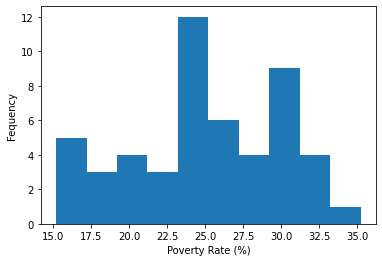

NormaltestResult(statistic=2.7129841778917414, pvalue=0.2575627011402239)

In [118]:
#Test if the distribution is normal
plt.hist(poverty_rate)
plt.xlabel("Poverty Rate (%)")
plt.ylabel('Fequency')
plt.savefig("../Output/PovertyRateHist_jw.png")
plt.show()
sts.normaltest(poverty_rate)